In [2]:
from google.colab import files

# Upload file manually
uploaded = files.upload()


Saving Coffee Shop Sales.xlsx to Coffee Shop Sales.xlsx


In [5]:
!pip install pandas openpyxl



In [6]:
import os
os.listdir()  # This will show uploaded files in Colab


['.config', 'Coffee Shop Sales.xlsx', 'sample_data']

In [7]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Coffee Shop Sales.xlsx", engine="openpyxl")

# Display first 5 rows
print(df.head())


   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

In [8]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time


In [9]:
print(df.isnull().sum())  # Check missing values

# Fill missing values (Example: Filling missing store locations with 'Unknown')
df['store_location'].fillna('Unknown', inplace=True)

# Drop rows with critical missing values
df.dropna(subset=['transaction_qty', 'unit_price'], inplace=True)


transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


<ipython-input-9-99a8cbd03cb5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_location'].fillna('Unknown', inplace=True)


In [10]:
df.drop_duplicates(inplace=True)


In [11]:
import numpy as np

# Define threshold (Example: Transactions above the 99th percentile)
q_high = df['transaction_qty'].quantile(0.99)
df = df[df['transaction_qty'] <= q_high]

q_high_price = df['unit_price'].quantile(0.99)
df = df[df['unit_price'] <= q_high_price]


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


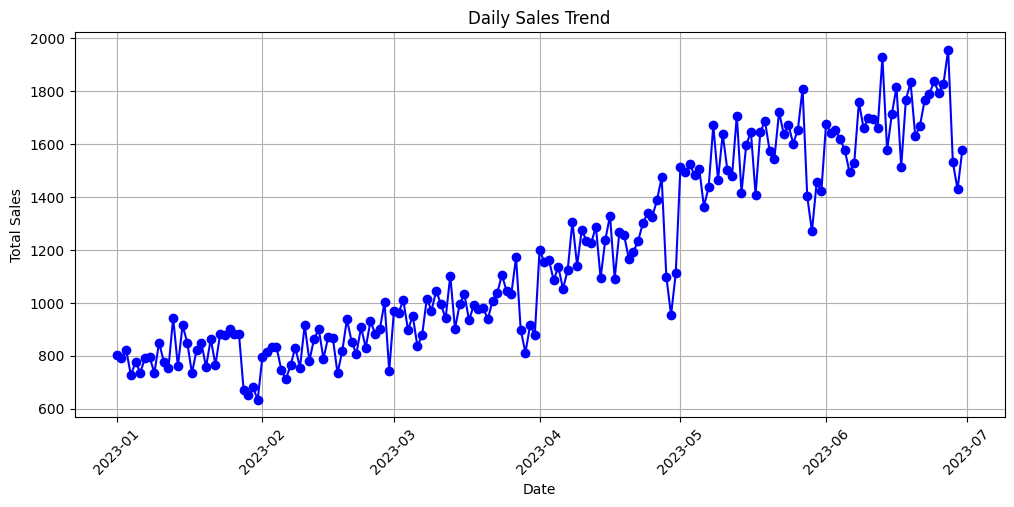

In [13]:
daily_sales = df.groupby('transaction_date')['transaction_qty'].sum()

plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
plt.grid()
plt.show()


<ipython-input-14-aec8e7b8c34d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')


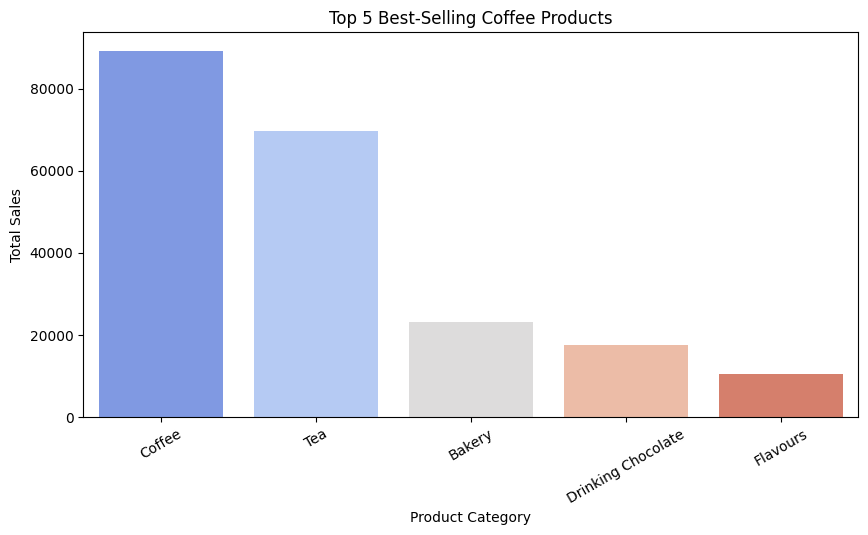

In [14]:
top_products = df.groupby('product_category')['transaction_qty'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Top 5 Best-Selling Coffee Products')
plt.xticks(rotation=30)
plt.show()


<ipython-input-15-51bc738c8cdc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales.index, y=store_sales.values, palette='viridis')


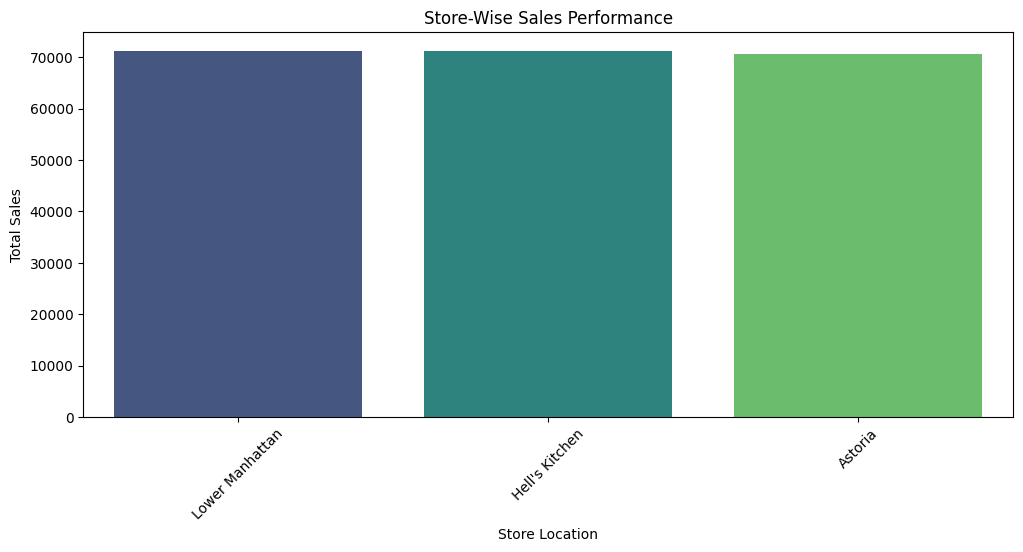

In [15]:
store_sales = df.groupby('store_location')['transaction_qty'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=store_sales.index, y=store_sales.values, palette='viridis')
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.title('Store-Wise Sales Performance')
plt.xticks(rotation=45)
plt.show()


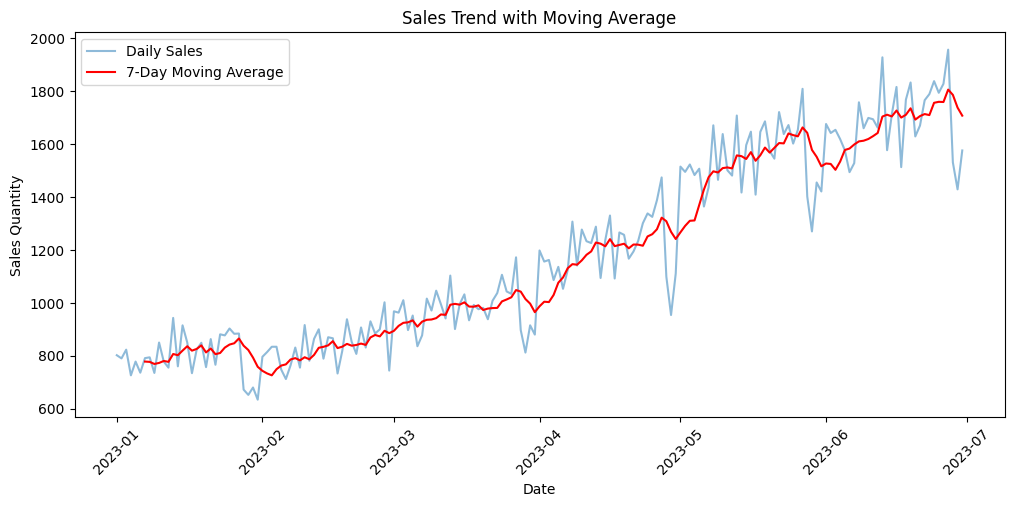

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert transaction_date to datetime format
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

# Group by date to get daily sales
df_daily_sales = df.groupby("transaction_date")["transaction_qty"].sum().reset_index()

# Compute 7-day moving average
df_daily_sales["7-Day Moving Avg"] = df_daily_sales["transaction_qty"].rolling(window=7).mean()

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(df_daily_sales["transaction_date"], df_daily_sales["transaction_qty"], label="Daily Sales", alpha=0.5)
plt.plot(df_daily_sales["transaction_date"], df_daily_sales["7-Day Moving Avg"], color='red', label="7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.title("Sales Trend with Moving Average")
plt.legend()
plt.xticks(rotation=45)
plt.show()



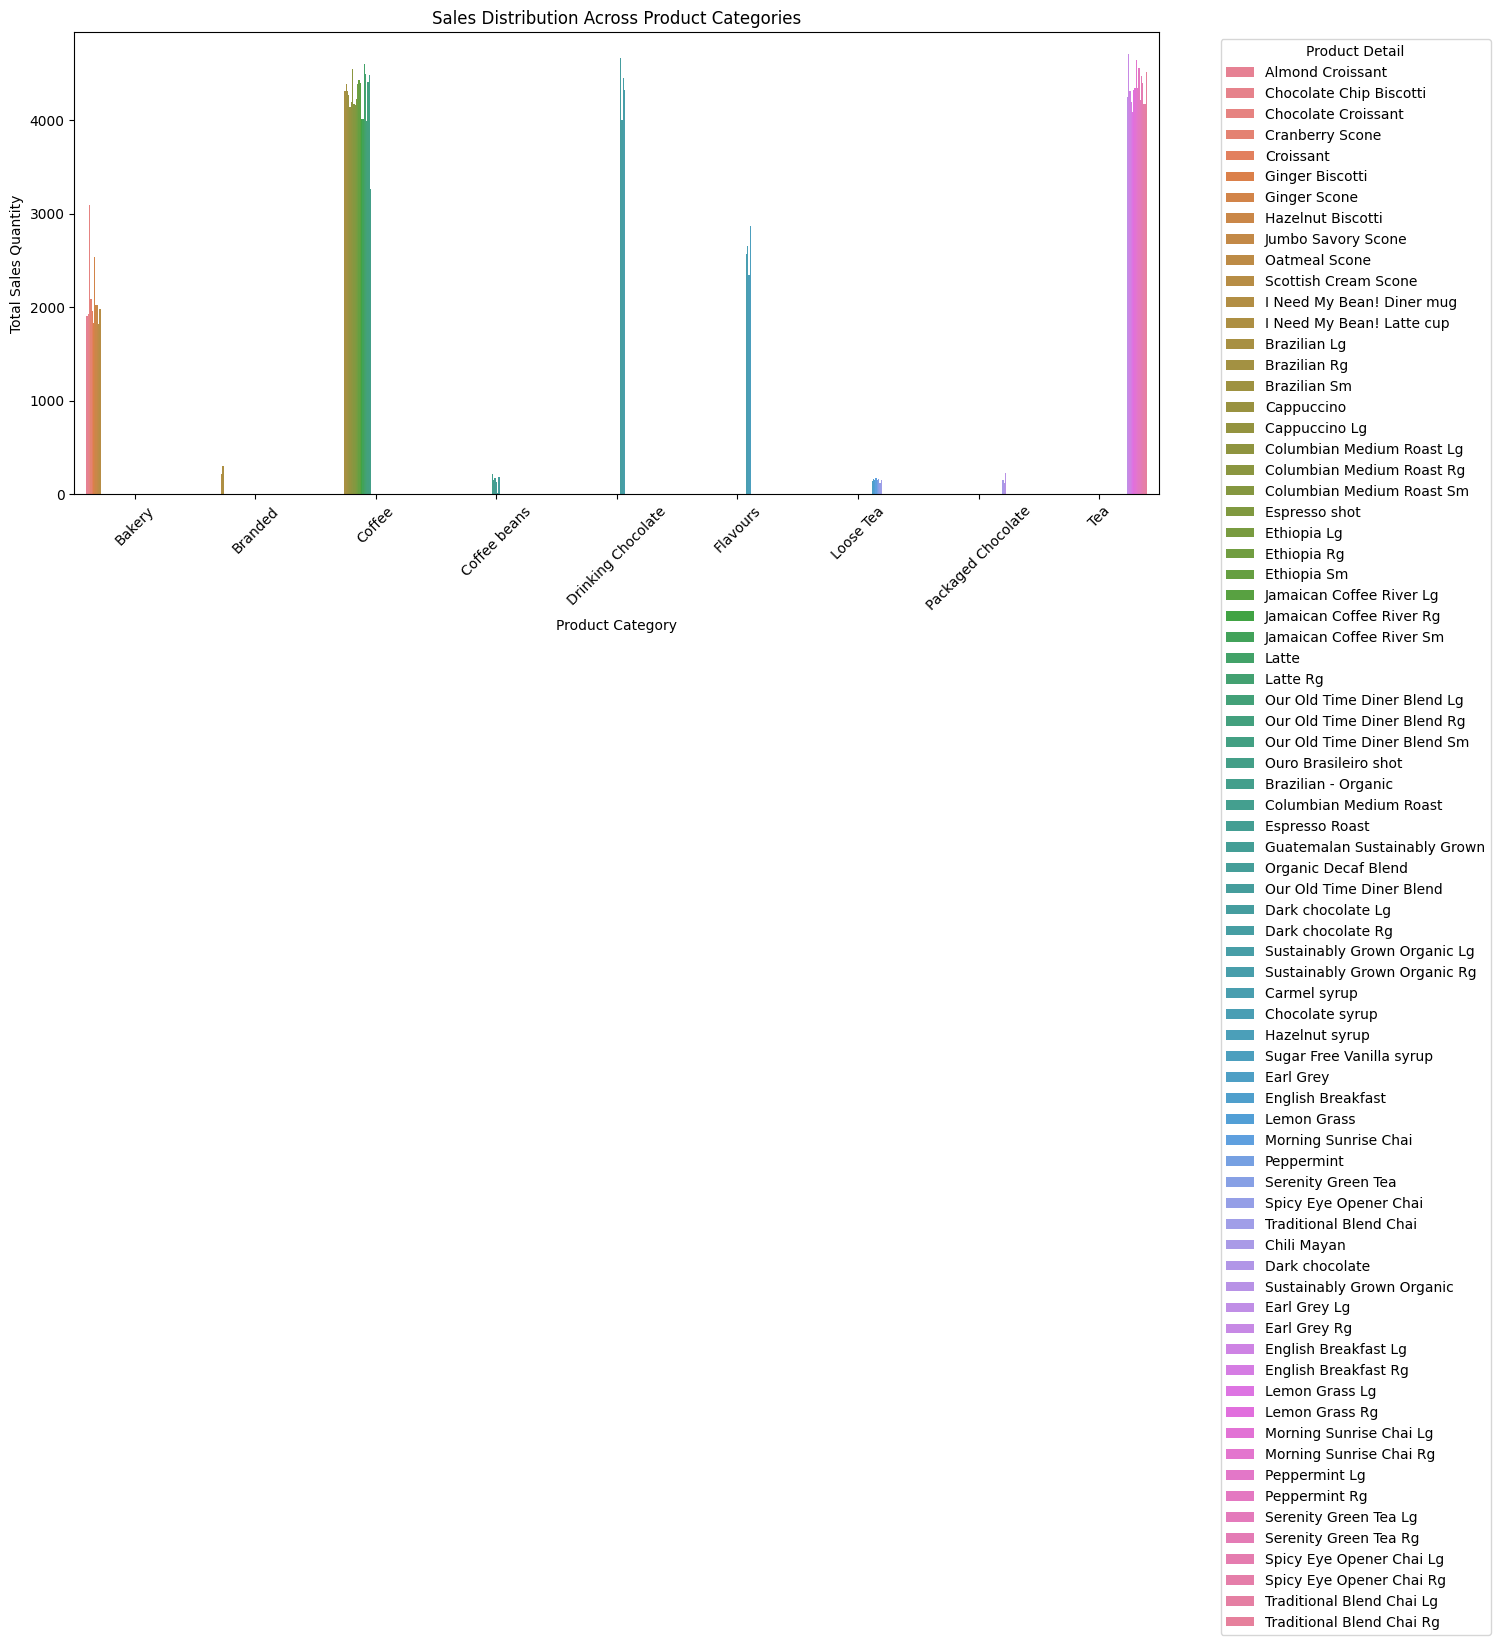

In [18]:
category_sales = df.groupby(["product_category", "product_detail"])["transaction_qty"].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x="product_category", y="transaction_qty", hue="product_detail", data=category_sales)
plt.xlabel("Product Category")
plt.ylabel("Total Sales Quantity")
plt.title("Sales Distribution Across Product Categories")
plt.xticks(rotation=45)
plt.legend(title="Product Detail", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


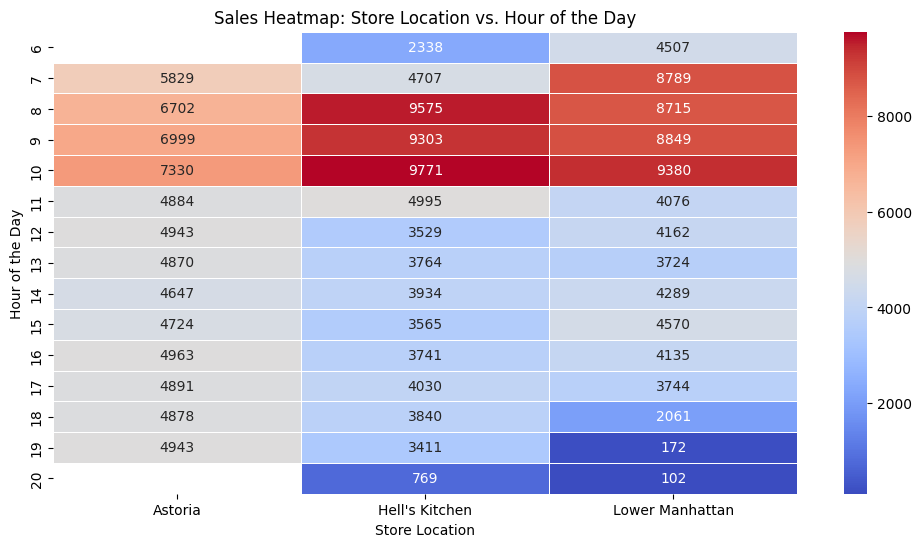

In [19]:
# Convert transaction_time to hour
df["hour"] = pd.to_datetime(df["transaction_time"], format='%H:%M:%S').dt.hour

# Pivot table for heatmap
heatmap_data = df.pivot_table(index="hour", columns="store_location", values="transaction_qty", aggfunc="sum")

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Store Location")
plt.ylabel("Hour of the Day")
plt.title("Sales Heatmap: Store Location vs. Hour of the Day")
plt.show()


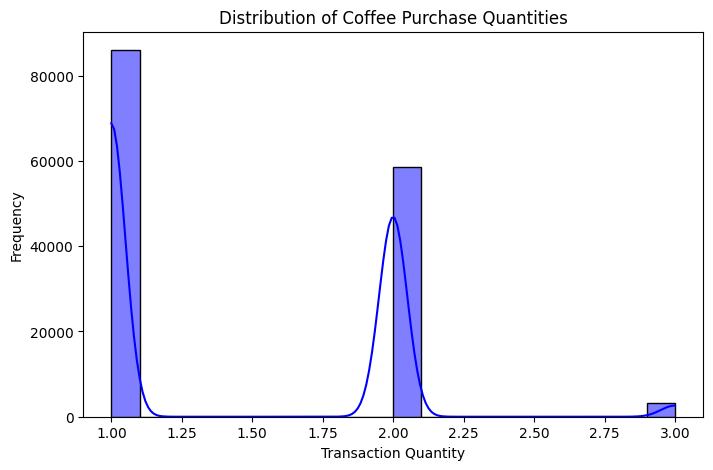

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df["transaction_qty"], bins=20, kde=True, color="blue")
plt.xlabel("Transaction Quantity")
plt.ylabel("Frequency")
plt.title("Distribution of Coffee Purchase Quantities")
plt.show()


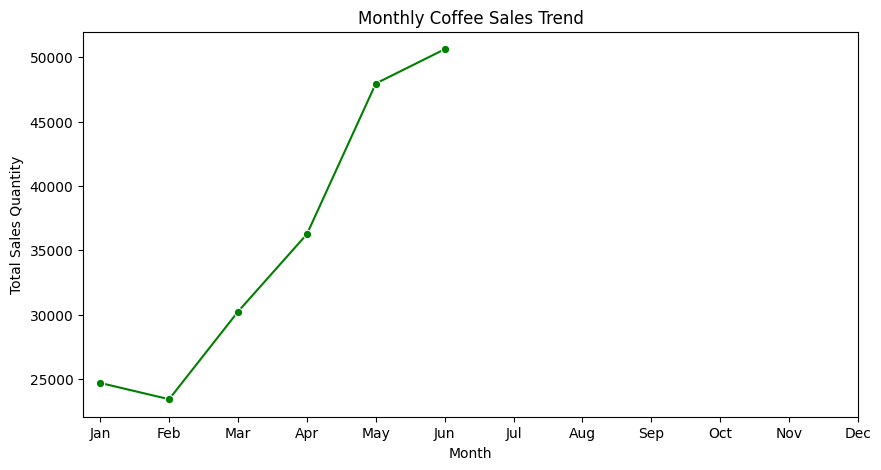

In [21]:
df["month"] = df["transaction_date"].dt.month
monthly_sales = df.groupby("month")["transaction_qty"].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="green")
plt.xlabel("Month")
plt.ylabel("Total Sales Quantity")
plt.title("Monthly Coffee Sales Trend")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


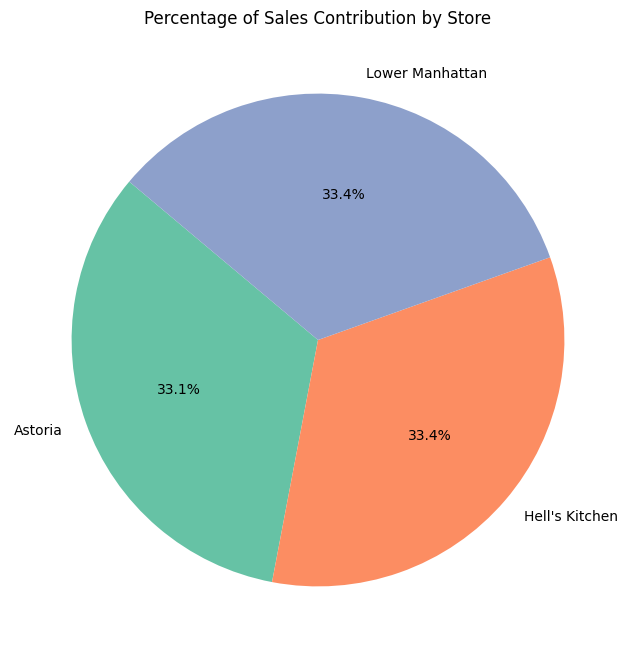

In [22]:
store_sales = df.groupby("store_location")["transaction_qty"].sum()

plt.figure(figsize=(8, 8))
plt.pie(store_sales, labels=store_sales.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Set2"))
plt.title("Percentage of Sales Contribution by Store")
plt.show()


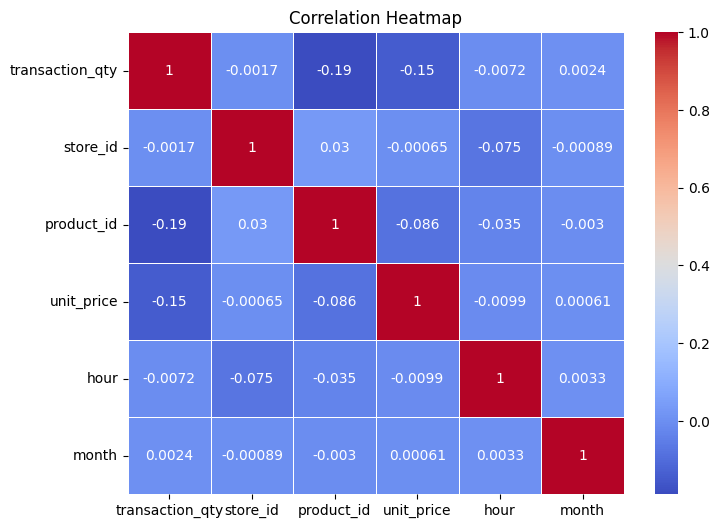

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns before computing correlation
df_corr = df.drop(columns=["transaction_id", "transaction_date", "transaction_time", "store_location", "product_category", "product_type", "product_detail"])

# Compute correlation matrix
correlation_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [26]:
# Convert 'transaction_date' to datetime format
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

# Extract useful date features
df["year"] = df["transaction_date"].dt.year
df["month"] = df["transaction_date"].dt.month
df["day"] = df["transaction_date"].dt.day
df["day_of_week"] = df["transaction_date"].dt.dayofweek

# Drop unwanted columns (ID, Date, Time, Categorical)
df.drop(columns=["transaction_id", "transaction_date", "transaction_time", "store_location", "product_category", "product_type", "product_detail"], inplace=True)

# Encode categorical variables (store_id and product_id)
label_encoder = LabelEncoder()
df["store_id"] = label_encoder.fit_transform(df["store_id"])
df["product_id"] = label_encoder.fit_transform(df["product_id"])


In [27]:
# Define target variable (Sales Quantity)
X = df.drop(columns=["transaction_qty"])  # Features
y = df["transaction_qty"]  # Target

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Absolute Error: 0.48
Mean Squared Error: 0.27
R-squared Score: 0.06


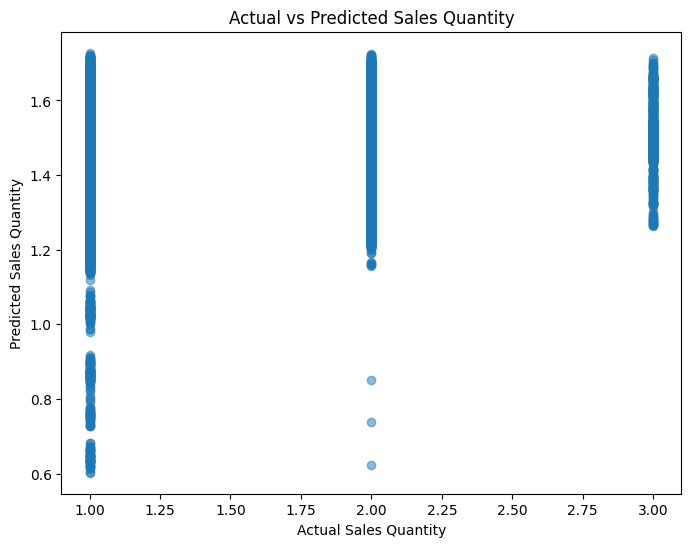

In [29]:
# Plot actual vs predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales Quantity")
plt.ylabel("Predicted Sales Quantity")
plt.title("Actual vs Predicted Sales Quantity")
plt.show()


In [31]:
# Predict sales quantity using the trained model
y_pred = model.predict(X_test)



In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print results
print(f"📊 Model Evaluation Results:")
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f} (closer to 1 is better)")


📊 Model Evaluation Results:
✅ Mean Absolute Error (MAE): 0.48
✅ Mean Squared Error (MSE): 0.27
✅ Root Mean Squared Error (RMSE): 0.52
✅ R² Score: 0.06 (closer to 1 is better)


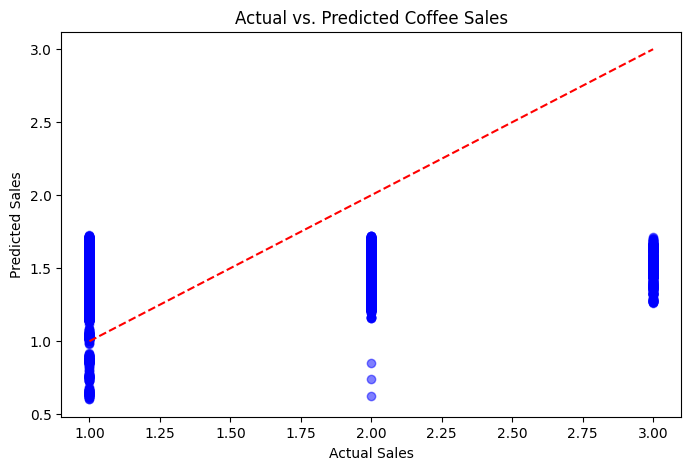

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Coffee Sales")
plt.show()
